In [23]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz,  plot_tree
from sklearn import metrics

In [24]:
employee = pd.read_csv('../data/employee_cleaned.csv')
employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Duration
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,3
1,Bachelors,2013,Pune,1,28,Female,No,3,1,7
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,6
3,Masters,2016,Bangalore,3,27,Male,No,5,1,4
4,Masters,2017,Pune,3,24,Male,Yes,2,1,3


### Replace Education categorical to numerical values

In [25]:
#employee['Education'].replace({'PHD': 'a', 'Masters': 'b', 'Bachelors': 'c'}, inplace=True)
employee['Education'].replace(to_replace = ['PHD', 'Masters', 'Bachelors'], value = ['3', '2', '1'], inplace = True)
employee['Education'] = employee['Education'].astype('int64')
employee.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   int64 
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
 9   Duration                   2764 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 216.1+ KB


## Split the data into training and test sets

In [26]:
employee_train, employee_test = train_test_split(employee, test_size = 0.40, random_state = 7)
print(employee.shape)
print(employee_train.shape)
print(employee_test.shape)

(2764, 10)
(1658, 10)
(1106, 10)


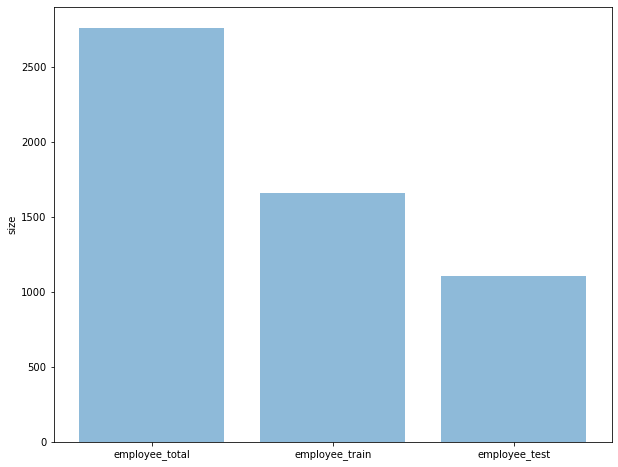

In [27]:
portion = ('employee_total', 'employee_train', 'employee_test')
y_pos = np.arange(len(portion))
size = [2764,1658,1106]

plt.bar(y_pos, size, align='center', alpha=0.5)
plt.xticks(y_pos, portion)
plt.ylabel('size')

plt.show()

### Separate data frames for interested predictor variables and response variable

### *Data with all predictor variables

In [28]:
#---Training set---

x_all = employee_train.drop(['LeaveOrNot'], axis= 1)
x_all = pd.get_dummies(x_all)
y_all = employee_train[['LeaveOrNot']]
y_names_all = ["No", "Yes"]

#---Test set---

x_test_all = employee_test.drop(['LeaveOrNot'], axis= 1)
x_test_all = pd.get_dummies(x_test_all)
y_test_all = employee_test[['LeaveOrNot']]

x_all.head(2)


,Education,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Duration,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
2040,1,2017,3,33,5,3,0,0,1,0,1,0,1
1872,1,2016,3,40,0,4,1,0,0,0,1,1,0


In [29]:
#Run C5.0 using entropy criterion
C5_all = DecisionTreeClassifier(criterion = "gini", \
                                max_leaf_nodes = 15, \
                                min_samples_leaf= 75).fit(x_all,y_all)
export_graphviz (C5_all, out_file = 'C5_all.dot')

#predict income in training data set
y_train_pred_all = C5_all.predict(x_all)
y_train_pred_all

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

[Text(250.4659090909091, 403.81714285714287, 'Duration <= 2.5\ngini = 0.472\nsamples = 1658\nvalue = [1026, 632]\nclass = No'),
 Text(225.10227272727272, 341.69142857142856, 'gini = 0.043\nsamples = 137\nvalue = [3, 134]\nclass = Yes'),
 Text(275.82954545454544, 341.69142857142856, 'PaymentTier <= 2.5\ngini = 0.44\nsamples = 1521\nvalue = [1023, 498]\nclass = No'),
 Text(126.81818181818181, 279.5657142857143, 'Gender_Male <= 0.5\ngini = 0.498\nsamples = 467\nvalue = [220, 247]\nclass = Yes'),
 Text(76.0909090909091, 217.44, 'Education <= 1.5\ngini = 0.448\nsamples = 286\nvalue = [97, 189]\nclass = Yes'),
 Text(50.72727272727273, 155.3142857142857, 'City_Pune <= 0.5\ngini = 0.348\nsamples = 183\nvalue = [41, 142]\nclass = Yes'),
 Text(25.363636363636363, 93.18857142857144, 'gini = 0.5\nsamples = 78\nvalue = [40, 38]\nclass = No'),
 Text(76.0909090909091, 93.18857142857144, 'gini = 0.019\nsamples = 105\nvalue = [1, 104]\nclass = Yes'),
 Text(101.45454545454545, 155.3142857142857, 'gini =

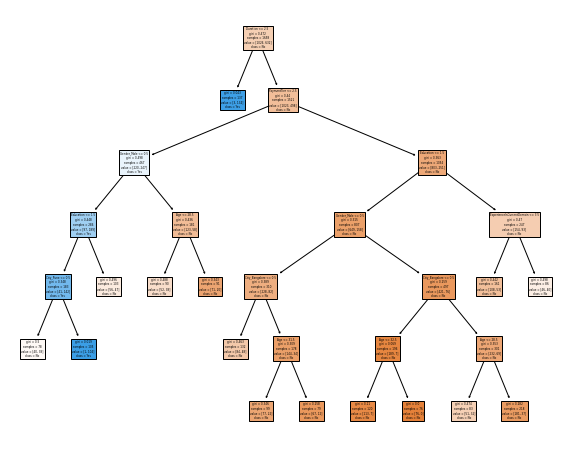

In [30]:
#Visualize the tree
plt.rcParams['figure.figsize'] = (10, 8)
plot_tree(C5_all, feature_names=x_all.columns.values, filled=True,
         class_names=y_names_all)

In [31]:
#make prediction
y_pred_all = C5_all.predict(x_test_all)

y_actual_all = pd.Series(employee_test['LeaveOrNot'], name='Actual')
y_predicted_all = pd.Series(y_pred_all, name='Predicted')

#create confusion matrix
tab_all = pd.crosstab(y_actual_all, y_predicted_all)
tab_all['Total'] = tab_all.sum(axis =1)
tab_all.loc['Total'] = tab_all.sum()
#
tab_all

Predicted,0,1,Total
Actual,,,
0,206,35,241
1,167,34,201
Total,373,69,442


In [32]:
print("Accuracy:",metrics.accuracy_score(y_test_all, y_pred_all))
print("Precision:",metrics.precision_score(y_test_all, y_pred_all))
print("Recall:",metrics.recall_score(y_test_all, y_pred_all))

Accuracy: 0.7414104882459313
Precision: 0.9829545454545454
Recall: 0.3793859649122807


#### Examine feature importance for C5_all model

In [33]:
from sklearn.inspection import permutation_importance
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

In [34]:
#Feature importance
feature_scores_all = pd.Series(C5_all.feature_importances_, index= x_all.columns).sort_values(ascending=False)

feature_scores_all

Duration                     0.400658
PaymentTier                  0.206009
Gender_Male                  0.114612
Education                    0.097214
City_Pune                    0.085358
City_Bangalore               0.050479
Age                          0.037873
ExperienceInCurrentDomain    0.007798
JoiningYear                  0.000000
City_New Delhi               0.000000
Gender_Female                0.000000
EverBenched_No               0.000000
EverBenched_Yes              0.000000
dtype: float64

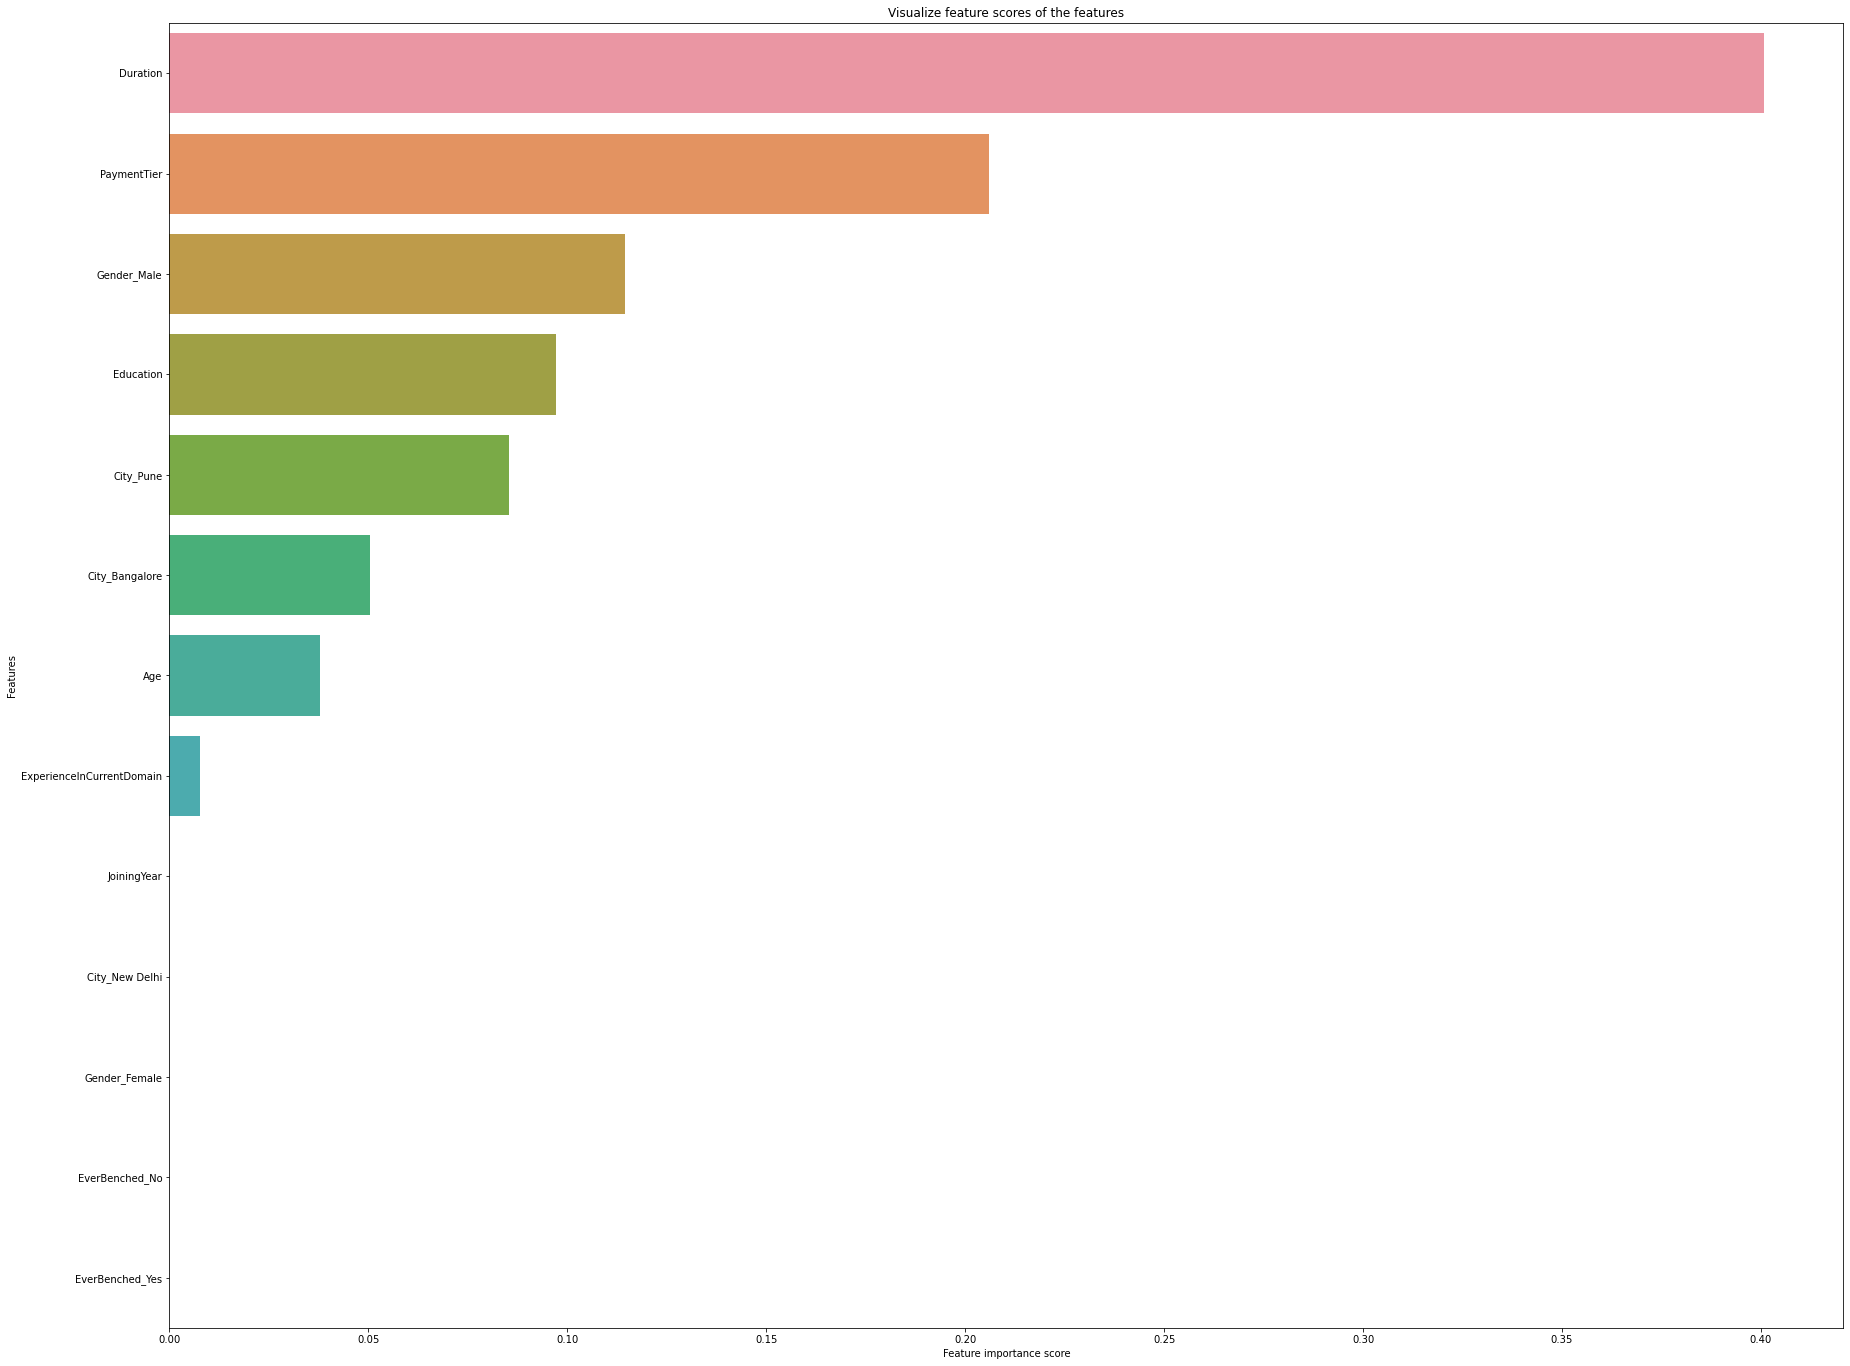

In [35]:
# Creating a seaborn bar plot
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores_all, y=feature_scores_all.index, data = x_all[[]])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores_all.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### -->
### --> It seems Duration, PaymentTier, Gender  and City are a good candidate for a simplified model

### *Data with Duration, PaymentTier, Gender and Education as predictor variables 

In [36]:
'Duration', 'PaymentTier', 'Gender', 'City'

('Duration', 'PaymentTier', 'Gender', 'City')

In [37]:
#---Training set---

x = employee_train[['Duration', 'PaymentTier', 'Gender', 'City']]
x = pd.get_dummies(x)
y = employee_train[['LeaveOrNot']]
x_names = ['Duration', 'PaymentTier', 'Gender', 'City']
x_names = x.columns.values
y_names = ["No", "Yes"]

#---Test set---

x_test = employee_test[['Duration', 'PaymentTier', 'Gender', 'City']]
x_test = pd.get_dummies(x_test)
y_test = employee_test[['LeaveOrNot']]
x_test_names = x_test.columns
y_test_names = ["No", "Yes"]

x.head(2)

,Duration,PaymentTier,Gender_Female,Gender_Male,City_Bangalore,City_New Delhi,City_Pune
2040,3,3,0,1,0,0,1
1872,4,3,0,1,1,0,0


In [38]:
#Run C5.0 using entropy criterion
C5 = DecisionTreeClassifier(criterion = "gini", \
                                max_leaf_nodes = 10, \
                                min_samples_leaf= 75).fit(x,y)
export_graphviz (C5, out_file = 'C5.dot')

#predict income in training data set
y_train_pred = C5.predict(x)
y_train_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

[Text(209.25, 398.64, 'Duration <= 2.5\ngini = 0.472\nsamples = 1658\nvalue = [1026, 632]\nclass = No'),
 Text(162.75, 326.15999999999997, 'gini = 0.043\nsamples = 137\nvalue = [3, 134]\nclass = Yes'),
 Text(255.75, 326.15999999999997, 'PaymentTier <= 2.5\ngini = 0.44\nsamples = 1521\nvalue = [1023, 498]\nclass = No'),
 Text(139.5, 253.67999999999998, 'Gender_Male <= 0.5\ngini = 0.498\nsamples = 467\nvalue = [220, 247]\nclass = Yes'),
 Text(93.0, 181.2, 'City_Pune <= 0.5\ngini = 0.448\nsamples = 286\nvalue = [97, 189]\nclass = Yes'),
 Text(46.5, 108.71999999999997, 'gini = 0.5\nsamples = 146\nvalue = [71, 75]\nclass = Yes'),
 Text(139.5, 108.71999999999997, 'gini = 0.302\nsamples = 140\nvalue = [26, 114]\nclass = Yes'),
 Text(186.0, 181.2, 'gini = 0.436\nsamples = 181\nvalue = [123, 58]\nclass = No'),
 Text(372.0, 253.67999999999998, 'Gender_Female <= 0.5\ngini = 0.363\nsamples = 1054\nvalue = [803, 251]\nclass = No'),
 Text(279.0, 181.2, 'City_Pune <= 0.5\ngini = 0.321\nsamples = 652\

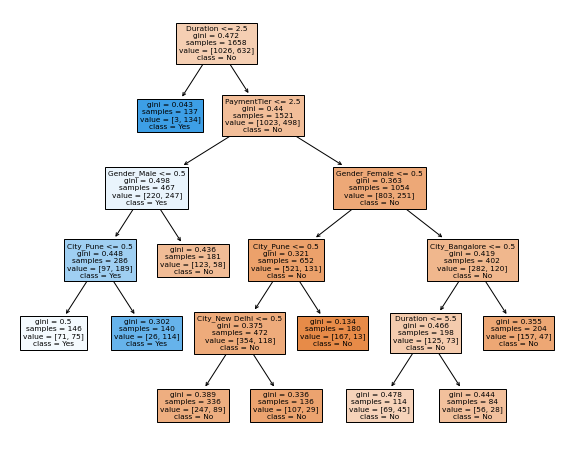

In [39]:
#Visualize the tree
plt.rcParams['figure.figsize'] = (10, 8)
plot_tree(C5, feature_names=x.columns.values, filled=True,
         class_names=y_names)

In [40]:
#make prediction
y_pred = C5.predict(x_test)

y_actual = pd.Series(employee_test['LeaveOrNot'], name='Actual')
y_predicted = pd.Series(y_pred, name='Predicted')

#create confusion matrix
tab1 = pd.crosstab(y_actual, y_predicted)
tab1['Total'] = tab1.sum(axis =1)
tab1.loc['Total'] = tab1.sum()
tab1

Predicted,0,1,Total
Actual,,,
0,184,57,241
1,150,51,201
Total,334,108,442


In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7115732368896925
Precision: 0.7455197132616488
Recall: 0.45614035087719296


#### Examine feature importance for C5 model

In [42]:
#Feature importance
feature_scores = pd.Series(C5.feature_importances_, index= x.columns).sort_values(ascending=False)

feature_scores

Duration          0.491106
PaymentTier       0.251653
Gender_Male       0.118136
City_Pune         0.097273
Gender_Female     0.021782
City_Bangalore    0.017675
City_New Delhi    0.002375
dtype: float64

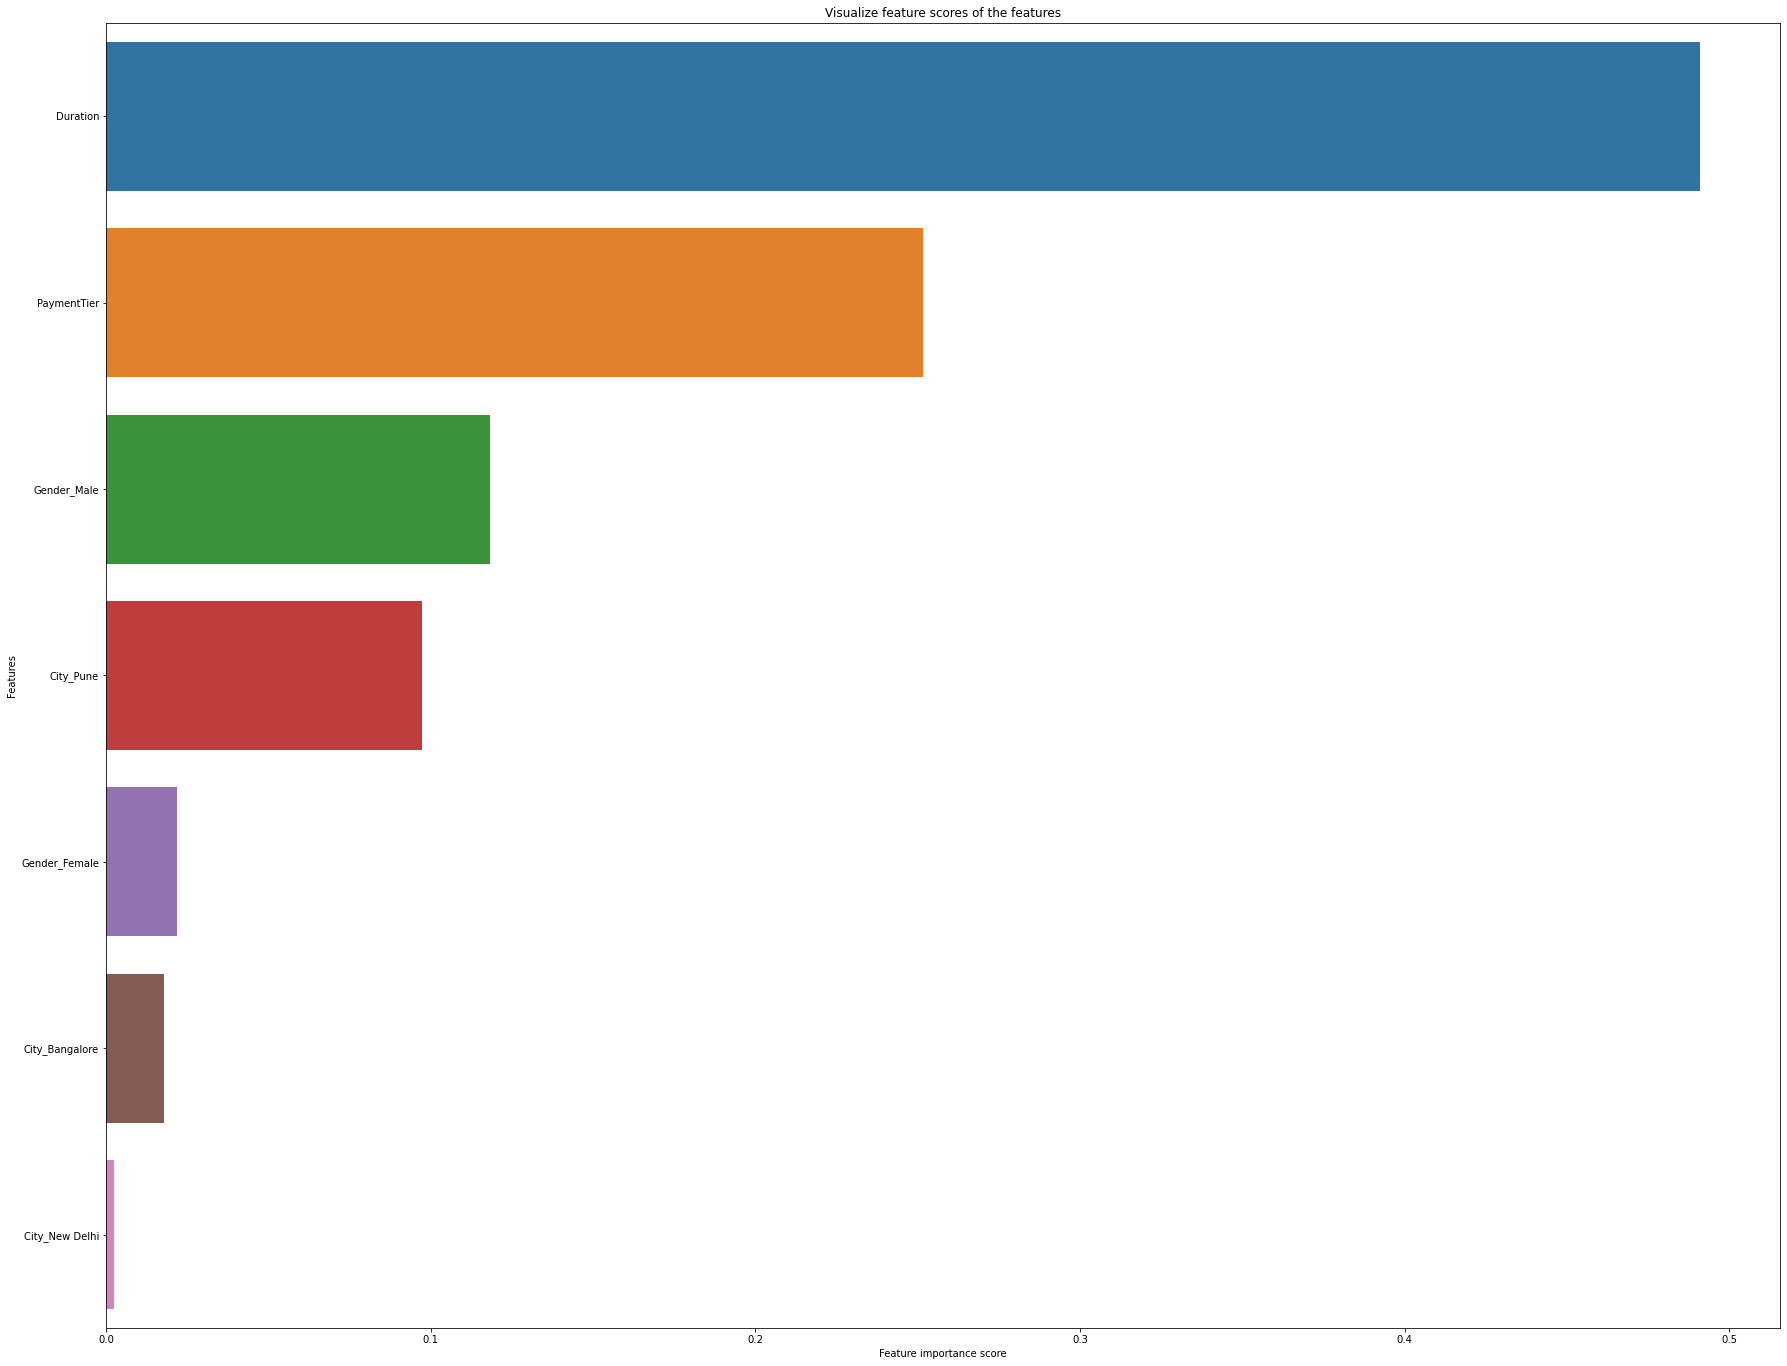

In [43]:
# Creating a seaborn bar plot
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data = x[[]])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()